In [10]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=False)
rc('font', family='serif')

C:\Users\dcald\AppData\Local\Temp\ipykernel_15764\1465405999.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv("forward-process.txt", delim_whitespace=True, header=None,encoding="utf-16")


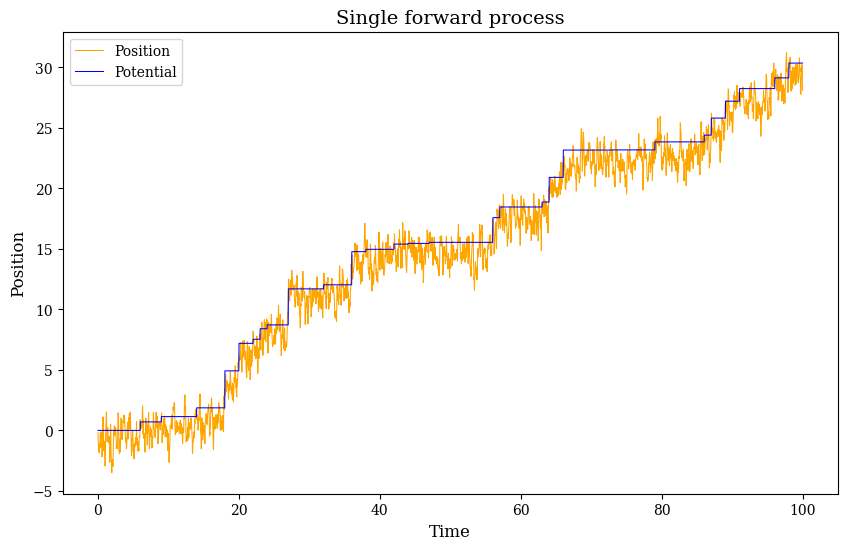

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv("forward-process.txt", delim_whitespace=True, header=None,encoding="utf-16")
# Assign column names for clarity
data.columns = ['Time', 'Position', 'Potential']

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Position'], label='Position',color='orange', linewidth=0.75)
plt.plot(data['Time'], data['Potential'], label='Potential',color='blue', linewidth=0.75)

# Adding labels, title, and legend
plt.title(r'Single forward process', fontsize=14)
plt.xlabel(r'Time', fontsize=12)
plt.ylabel(r'Position', fontsize=12)
plt.legend(fontsize=10)
# Display the plot
plt.show()
#plt.savefig('forward-process.pdf',format='pdf')